In [1]:
import torch
print(torch.__version__)

2.7.1+cpu


In [46]:
import os
with open('the-verdict.txt', 'r', encoding="utf-8") as f:
    raw_text = f.read()
print(len(raw_text))

20479


In [47]:
raw_text[:100]

'I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no g'

In [4]:
import re
text = "Hello, world! This is a test."
result = re.split(r'([,.]|\s)', text)
print(result)

['Hello', ',', '', ' ', 'world!', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [5]:
result = re.split(r'([,.!]|\s)', text)
print(result)

['Hello', ',', '', ' ', 'world', '!', '', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [6]:
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '!', 'This', 'is', 'a', 'test', '.']


In [7]:
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '!', 'This', 'is', 'a', 'test', '.']


In [8]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item for item in preprocessed if item.strip()]
print(preprocessed[:10])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius']


In [9]:
print(len(preprocessed))

4690


In [10]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 1130


In [11]:
vocab = {token:integer for integer, token in enumerate(all_words)}

In [12]:
for integer, token in enumerate(vocab.items()):
    print(token)
    if integer >= 40:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)


In [13]:
class Tokenizer:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {integer: string for string, integer in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
        
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [14]:
tokenizer = Tokenizer(vocab)
text = """"It's the last he painted, you know," 
           Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [15]:
text = tokenizer.decode(ids)
print(text)

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


In [16]:
print(tokenizer.decode(tokenizer.encode(text)))

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


In [17]:
text = "Hello, world! This is a test."
ids = tokenizer.encode(text)
print(ids)

KeyError: 'Hello'

In [18]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token: integer for integer, token in enumerate(all_tokens)}

In [19]:
len(vocab.items())

1132

In [20]:
for i, token in enumerate(list(vocab.items())[-5:]):
    print(token)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [21]:
class TokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {integer: string for string, integer in vocab.items()}
        self.pattern = re.compile(r'([,.:;?_!"()\']|--|\s)')

    def encode(self, text):
        preprocessed = self.pattern.split(text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed
        ]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text
    
    

In [22]:
tokenizer = TokenizerV2(vocab)

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))

print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [23]:
tokenizer.encode(text)

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]

In [24]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.'

In [25]:
from collections import Counter
import re
text = "hello, world! this is a test."
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
preprocessed = [item for item in preprocessed if item.strip()]
char_count = Counter(text)
print(char_count)

Counter({' ': 5, 'l': 3, 't': 3, 's': 3, 'h': 2, 'e': 2, 'o': 2, 'i': 2, ',': 1, 'w': 1, 'r': 1, 'd': 1, '!': 1, 'a': 1, '.': 1})


In [26]:
# initalize the vocab : split the each word into characters with a special end of character </w>
from collections import defaultdict, Counter

def get_vocab(corpus):
    vocab = defaultdict(int)
    for word in corpus:
        chars = list(word) + ['</w>']
        vocab[' '.join(chars)] += 1
    return vocab
        

In [27]:
# count pair frequencies

def get_pair_freq(vocab):
    pairs = defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        print(len(symbols))
        print(symbols)
        for i in range(len(symbols) - 1):
            pair = (symbols[i], symbols[i + 1])
            pairs[pair] += freq
    return pairs

In [28]:
# merge the most frequent pair
def merge_vocab(pair, vocab):
    new_vocab = {}
    bigram = ' '.join(pair)
    replacement = ''.join(pair)
    for word in vocab:
        new_word = word.replace(bigram, replacement)
        new_vocab[new_word] = vocab[word]
    return new_vocab

In [29]:
def train_bpe(corpus, num_merges):
    vocab = get_vocab(corpus)
    for _ in range(num_merges):
        pairs = get_pair_freq(vocab)
        if not pairs:
            break
        best_pair = max(pairs, key=pairs.get)
        vocab = merge_vocab(best_pair, vocab)
    return vocab

In [30]:
corpus = ["low", "lowest", "newer", "wider"]
bpe_vocab = train_bpe(corpus, num_merges=10)

for word in bpe_vocab:
    print(f"{word}: {bpe_vocab[word]}")

4
['l', 'o', 'w', '</w>']
7
['l', 'o', 'w', 'e', 's', 't', '</w>']
6
['n', 'e', 'w', 'e', 'r', '</w>']
6
['w', 'i', 'd', 'e', 'r', '</w>']
3
['lo', 'w', '</w>']
6
['lo', 'w', 'e', 's', 't', '</w>']
6
['n', 'e', 'w', 'e', 'r', '</w>']
6
['w', 'i', 'd', 'e', 'r', '</w>']
2
['low', '</w>']
5
['low', 'e', 's', 't', '</w>']
6
['n', 'e', 'w', 'e', 'r', '</w>']
6
['w', 'i', 'd', 'e', 'r', '</w>']
2
['low', '</w>']
5
['low', 'e', 's', 't', '</w>']
5
['n', 'e', 'w', 'er', '</w>']
5
['w', 'i', 'd', 'er', '</w>']
2
['low', '</w>']
5
['low', 'e', 's', 't', '</w>']
4
['n', 'e', 'w', 'er</w>']
4
['w', 'i', 'd', 'er</w>']
1
['low</w>']
5
['low', 'e', 's', 't', '</w>']
4
['n', 'e', 'w', 'er</w>']
4
['w', 'i', 'd', 'er</w>']
1
['low</w>']
4
['lowe', 's', 't', '</w>']
4
['n', 'e', 'w', 'er</w>']
4
['w', 'i', 'd', 'er</w>']
1
['low</w>']
3
['lowes', 't', '</w>']
4
['n', 'e', 'w', 'er</w>']
4
['w', 'i', 'd', 'er</w>']
1
['low</w>']
2
['lowest', '</w>']
4
['n', 'e', 'w', 'er</w>']
4
['w', 'i', 'd', 'er</w>

In [38]:
import re
from collections import  Counter, defaultdict

class BPETrainer:
    def __init__(self, vocab_size=100):
        self.vocab_size = vocab_size
        self.vocab = {}

    def get_stats(self, corpus):
        pairs = Counter()
        for word, freq in corpus.items():
            symbols = word.split()
            for i in range(len(symbols) - 1):
                pairs[(symbols[i], symbols[i + 1])] += freq
        return pairs

    def merge_vocab(self, pair, corpus):
        pattern = re.escape(' '.join(pair))
        pattern = re.compile(r'(?<!\S)' + pattern + r'(?!\S)')
        new_corpus = {}
        for word in corpus:
            new_word = pattern.sub(''.join(pair), word)
            new_corpus[new_word] = corpus[word]
        return new_corpus

    def fit(self, text):
        # Step 1: Split corpus into characters
        words = text.strip().split()
        corpus = Counter([' '.join(w) + ' </w>' for w in words])

        for i in range(self.vocab_size):
            pairs = self.get_stats(corpus)
            if not pairs:
                break
            best = pairs.most_common(1)[0][0]
            corpus = self.merge_vocab(best, corpus)

        self.vocab = {word.replace(' ', ''): idx for idx, word in enumerate(corpus)}
        return self.vocab



class TokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {v: k for k, v in vocab.items()}

    def encode(self, text):
        tokens = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        tokens = [t.strip() for t in tokens if t.strip()]
        ids = [self.str_to_int.get(t, self.str_to_int.get("<|unk|>", 0)) for t in tokens]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text



In [32]:
def visualize(tokenizer, text):
    ids = tokenizer.encode(text)
    pairs = [(tok, idx) for tok, idx in zip(text.split(), ids)]
    for tok, idx in pairs:
        print(f"{tok:15} → {idx}")


In [33]:
import numpy as np

def one_hot_encode(ids, vocab_size):
    one_hot = np.zeros((len(ids), vocab_size))
    for i, idx in enumerate(ids):
        one_hot[i, idx] = 1
    return one_hot

In [34]:
import numpy as np

class LearnedEmbedding:
    def __init__(self, vocab_size, embed_dim=8):
        self.embeddings = np.random.randn(vocab_size, embed_dim)

    def get_vector(self, token_id):
        return self.embeddings[token_id]


In [35]:
import numpy as np
import matplotlib.pyplot as plt

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def plot_cosine_matrix(embeddings, words):
    n = len(words)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            matrix[i, j] = cosine_similarity(embeddings[i], embeddings[j])

    plt.imshow(matrix, cmap='viridis')
    plt.xticks(range(n), words, rotation=45)
    plt.yticks(range(n), words)
    plt.colorbar()
    plt.title("Cosine Similarity of Learned Embeddings")
    plt.show()


Vocab: {'I</w>': 0, 'HAD</w>': 1, 'always</w>': 2, 'thought</w>': 3, 'Jack</w>': 4, 'Gisburn</w>': 5, 'rather</w>': 6, 'a</w>': 7, 'cheap</w>': 8, 'genius--though</w>': 9, 'good</w>': 10, 'fellow</w>': 11, 'enough--so</w>': 12, 'it</w>': 13, 'was</w>': 14, 'no</w>': 15, 'g</w>': 16}
I               → 0
HAD             → 0
always          → 0
thought         → 0
Jack            → 0
Gisburn         → 0
rather          → 0
a               → 0
cheap           → 0
genius--though  → 0
a               → 0
good            → 0
fellow          → 0
enough--so      → 0
it              → 0
was             → 0
no              → 0
great           → 0
surprise        → 0
to              → 0
me              → 0
to              → 0
hear            → 0
that,           → 0
in              → 0
the             → 0
height          → 0
of              → 0
his             → 0
glory,          → 0
he              → 0
had             → 0
dropped         → 0
his             → 0
painting,       → 0
married         

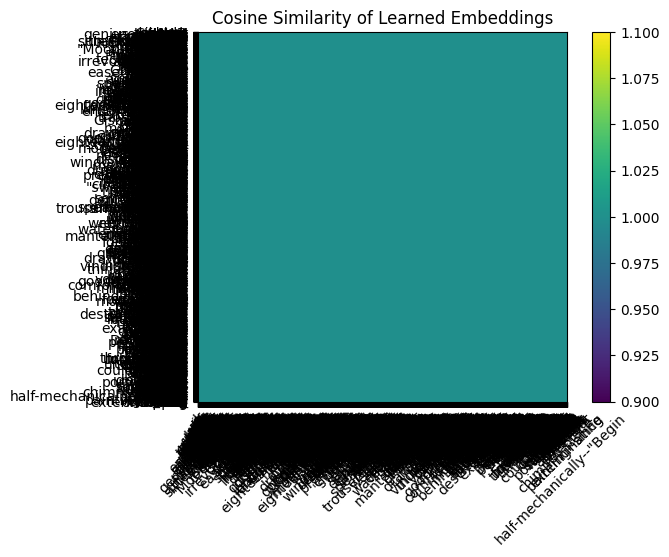

In [50]:


trainer = BPETrainer(vocab_size=50)
vocab = trainer.fit(raw_text[:100])

tokenizer = TokenizerV2(vocab)
print("Vocab:", vocab)

visualize(tokenizer, raw_text)

ids = tokenizer.encode(raw_text)
one_hot = one_hot_encode(ids, len(vocab))
embedding = LearnedEmbedding(len(vocab))
vectors = [embedding.get_vector(i) for i in ids]

plot_cosine_matrix(vectors, raw_text.split())
